In [1]:
%pip install imbalanced-learn
%pip install nltk 
%pip install spacy 
%pip install numpy==1.21.0 
%pip install gensim
%pip install --upgrade scikit-learn
%pip install --upgrade matplotlib
%pip install --upgrade pandas
%pip install --upgrade seaborn
%pip install fasttext


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.0.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp312-cp312-macosx_14_0_arm64.whl (5.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

data = "/Users/manitk/Desktop/SEM_V/ML_Project/Datasets/jira_issues_issue_type.csv"

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/manitk/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manitk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/manitk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/manitk/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/manitk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/manitk/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /Users/manitk/nltk_data...
[nltk_data]   Package words i

In [3]:
df = pd.read_csv(data)
description = df['description'] 
type = df['type']
new_data = pd.DataFrame({'description': description, 'type': type})
new_data = new_data.dropna()

# removing normal & enhancement severity
new_data = new_data[new_data.type != 'normal']
new_data = new_data[new_data.type != 'ehancement']
new_data = new_data[new_data.type != '']
new_data = new_data[new_data.type != 'Optional']
print(new_data.head())
print("Number of rows in data =", new_data.shape[0])
X = new_data['description']
Y = new_data['type']

defect = ['Bug', 'Defect', 'Patch', 'Test', 'Clarification', 'Quality Risk', 'Support Patch', 'Backport', 'TCK Challenge', 'CTS Challenge']
improvement = ['Improvement', 'New Feature', 'Feature Request', 'Enhancement', 'Wish', 'Component Upgrade', 'Dependency upgrade', 'Remove Feature', 'Library Upgrade', 'Component  Upgrade', 'Refactoring', 'Release','Deprecation']
task = ['Task', 'Sub-task', 'Story', 'Documentation', 'Question', 'Brainstorming', 'Technical task', 'Umbrella', 'Suitable Name Search', 'Tracker', 'Epic', 'Requirement', 'New JIRA Project', 'Temp', 'RTC', 'Pruning', 'Support','Requirement ']

for i in Y:
    if i in defect:
        Y[Y == i] = 'defect'
    elif i in improvement:
        Y[Y == i] = 'improvement'
    elif i in task:
        Y[Y == i] = 'task'

print("Sample per Class =\n", new_data['type'].value_counts())

                                         description         type
0  A way to generate ebj/web projects with XDocle...  Improvement
1  When a repository starts up, we attempt to reg...          Bug
2  Section 3.5.7.2 of the JSR-283 specification (...          Bug
3  When property has been removed from node and t...          Bug
4  The plugin should support setting Eclipse's te...  New Feature
Number of rows in data = 637277
Sample per Class =
 type
defect         366640
improvement    195704
task            74933
Name: count, dtype: int64


In [4]:
print("Class distribution before deletion:\n", new_data['type'].value_counts())
def delete_per_class(df, class_column):
    new_df = df.groupby(class_column, group_keys=False).apply(lambda x: x.sample(frac=0.7, random_state=42))
    return new_df

new_data = delete_per_class(new_data, 'type')
print("Class distribution after deletion:\n", new_data['type'].value_counts())

Class distribution before deletion:
 type
defect         366640
improvement    195704
task            74933
Name: count, dtype: int64
Class distribution after deletion:
 type
defect         256648
improvement    136993
task            52453
Name: count, dtype: int64


/var/folders/s9/36vm9r8x107dqz0d1qm0_8y80000gn/T/ipykernel_76773/1700056394.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_df = df.groupby(class_column, group_keys=False).apply(lambda x: x.sample(frac=0.7, random_state=42))


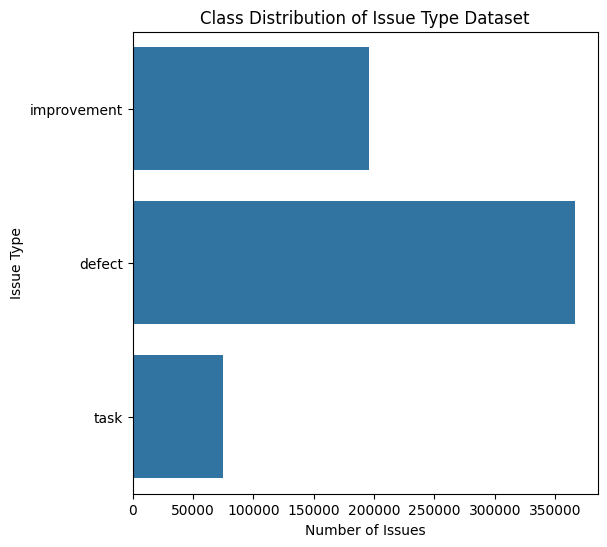

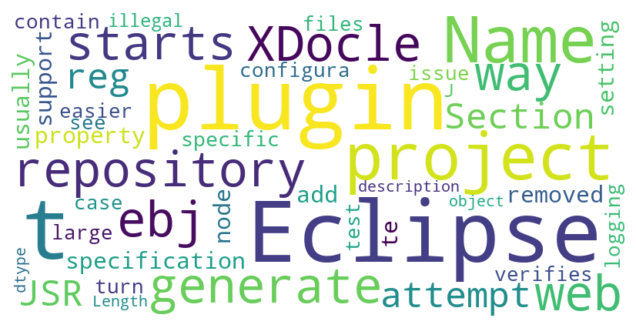

In [5]:
# EDA

# 1. Class Distribution
plt.figure(figsize=(6,6))
severity_order = new_data['type'].value_counts().index
sns.countplot(Y)
plt.title('Class Distribution of Issue Type Dataset')
plt.ylabel('Issue Type')
plt.xlabel('Number of Issues')
plt.show()

# 2. Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(str(X))
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
# PREPROCESSING & FEATURE EXTRACTION
X = new_data['description']
Y = new_data['type']

def preprocess_text(description):
    tokens = word_tokenize(description)
    tokens = [word.lower() for word in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Number of samples in train data =", X_train.shape[0])
print("Number of samples in test data =", X_test.shape[0])

print("First Sample before preprocessing: ",X_train.iloc[0])
X_train = X_train.apply(lambda x: preprocess_text(x))
X_test = X_test.apply(lambda x: preprocess_text(x))
print("First Sample after preprocessing: ",X_train.iloc[0])

# Feature Extraction
# TFIFD Vectorizer with Unigrams & Bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, min_df=5)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print("Number of features after feature extraction =", X_train.shape[1])

# dimensionality reduction
svd = TruncatedSVD(n_components=1000)
X_train = svd.fit_transform(X_train)
X_test = svd.transform(X_test)

Number of samples in train data = 334570
Number of samples in test data = 111524
First Sample before preprocessing:  I have created a file upload functionality in create.jspx as shown<form:create id="maps" modelAttribute="maps" multipart="true" path="/maps" render="${empty dependencies}" z="user-managed"><field:input disableFormBinding="true" field="map" id="map" type="file" z="user-managed"/>in my create mode , it works fine. But , after modifying update.jspx accordingly , i get a persistence error.When i debugged it in STS , i observed that , after clicking on update, the control moves on to the create function in the controller instead of going to the update function. May be this happens because of multipart=true , which might be modifying the default PUT method of update to POST which is of create. For time being , i have changed the path in the update form and pointing it to my actual update function. 
First Sample after preprocessing:  created file upload functionality create.jsp

In [9]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Classifier =", accuracy)
print(classification_report(y_test, y_pred))



/Users/manitk/Desktop/SEM_V/ML_Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression Classifier = 0.7248843298303504
              precision    recall  f1-score   support

      defect       0.77      0.88      0.82     64056
 improvement       0.65      0.61      0.63     34203
        task       0.55      0.25      0.34     13265

    accuracy                           0.72    111524
   macro avg       0.66      0.58      0.60    111524
weighted avg       0.71      0.72      0.71    111524



In [10]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( random_state=42, max_depth=100)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier =", accuracy)
print(classification_report(y_test, y_pred))



Accuracy of Decision Tree Classifier = 0.5814981528639576
              precision    recall  f1-score   support

      defect       0.71      0.70      0.71     64056
 improvement       0.47      0.47      0.47     34203
        task       0.27      0.27      0.27     13265

    accuracy                           0.58    111524
   macro avg       0.48      0.48      0.48    111524
weighted avg       0.58      0.58      0.58    111524



In [11]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=42, max_depth=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier =", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Classifier = 0.6785714285714286
              precision    recall  f1-score   support

      defect       0.68      0.94      0.79     64056
 improvement       0.65      0.42      0.51     34203
        task       0.81      0.11      0.20     13265

    accuracy                           0.68    111524
   macro avg       0.71      0.49      0.50    111524
weighted avg       0.69      0.68      0.63    111524



In [12]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42,activation='tanh',solver='sgd')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP Classifier =", accuracy)
print(classification_report(y_test, y_pred))


Accuracy of MLP Classifier = 0.7254940640579606
              precision    recall  f1-score   support

      defect       0.77      0.88      0.82     64056
 improvement       0.65      0.61      0.63     34203
        task       0.55      0.25      0.35     13265

    accuracy                           0.73    111524
   macro avg       0.66      0.58      0.60    111524
weighted avg       0.71      0.73      0.71    111524



In [13]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('dt', dt), 
    ('rf', rf), 
    ('mlp', mlp)
], voting='hard')  # Use 'hard' for majority voting (or 'soft' for weighted average)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Majority Voting Classifier =", accuracy)
print(classification_report(y_test, y_pred))

/Users/manitk/Desktop/SEM_V/ML_Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Majority Voting Classifier = 0.7055521681431799
              precision    recall  f1-score   support

      defect       0.72      0.92      0.81     64056
 improvement       0.67      0.51      0.58     34203
        task       0.60      0.18      0.28     13265

    accuracy                           0.71    111524
   macro avg       0.66      0.54      0.56    111524
weighted avg       0.69      0.71      0.68    111524



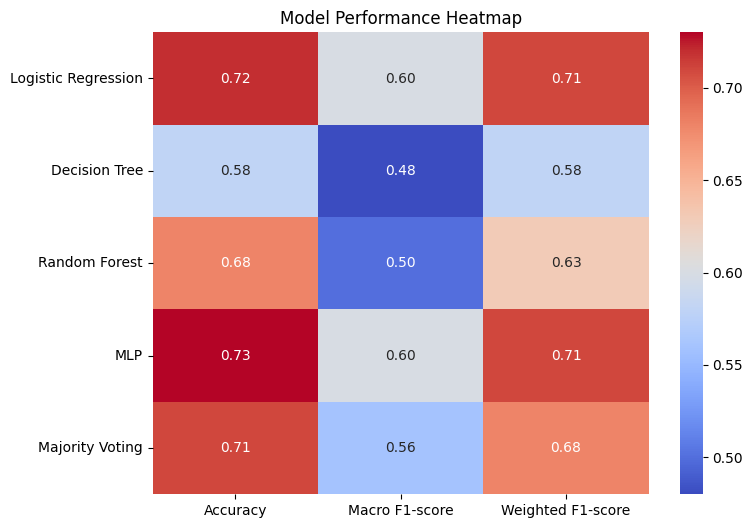

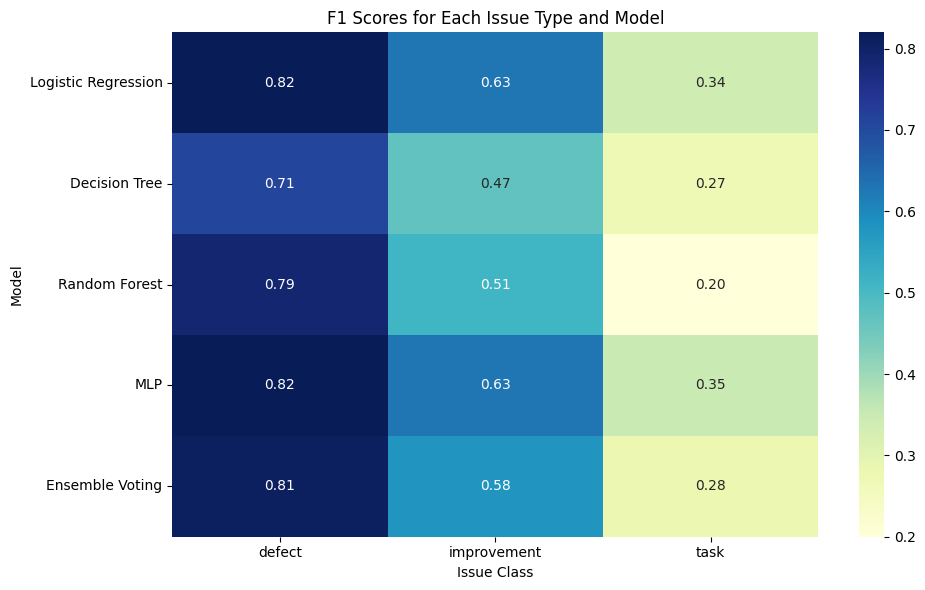

In [17]:
data = np.array([
    [0.72,0.60,0.71],  # Logistic Regression
    [0.58,0.48,0.58],  # Decision Tree
    [0.68,0.50,0.63],  # Random Forest
    [0.73,0.60,0.71],   # MLP
    [0.71,0.56,0.68] # Majority Voting
])

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLP', 'Majority Voting']
metrics = ['Accuracy', 'Macro F1-score', 'Weighted F1-score']

plt.figure(figsize=(8,6))
sns.heatmap(data, annot=True, xticklabels=metrics, yticklabels=models, cmap='coolwarm', cbar=True, fmt='.2f')

plt.title('Model Performance Heatmap')
plt.show()

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLP', 'Ensemble Voting']
classes = ['defect', 'improvement', 'task']

f1_scores = np.array([
    [0.82,0.63,0.34],  # Logistic Regression
    [0.71,0.47,0.27],  # Decision Tree
    [0.79,0.51,0.20],  # Random Forest
    [0.82,0.63,0.35],  # MLP
    [0.81,0.58,0.28]   # Ensemble Voting
])

plt.figure(figsize=(10, 6))
sns.heatmap(f1_scores, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=classes, yticklabels=models)
plt.ylabel('Model')
plt.xlabel('Issue Class')
plt.title('F1 Scores for Each Issue Type and Model')
plt.tight_layout()
plt.show()

In [6]:
# MID SEM 

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

X = [preprocess_text(text) for text in X]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Class distribution after handling imbalance:", Counter(y_train))
print("Class distribution after handling imbalance:", Counter(y_test))

classes = np.unique(y_train)
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = {classes[i]: class_weights[i] for i in range(len(class_weights))}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.9)),  # Fit and transform only on training data
    ('select', SelectKBest(chi2, k=2000)),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight = class_weights_dict))  # Multinomial Logistic Regression
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manitk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/manitk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Class distribution after handling imbalance: Counter({'defect': 293352, 'improvement': 156575, 'task': 59894})
Class distribution after handling imbalance: Counter({'defect': 73288, 'improvement': 39129, 'task': 15039})


/Users/manitk/Desktop/SEM V/ML_Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6777476148631685
Classification Report:
               precision    recall  f1-score   support

      defect       0.86      0.74      0.80     73288
 improvement       0.65      0.59      0.61     39129
        task       0.32      0.62      0.42     15039

    accuracy                           0.68    127456
   macro avg       0.61      0.65      0.61    127456
weighted avg       0.73      0.68      0.70    127456



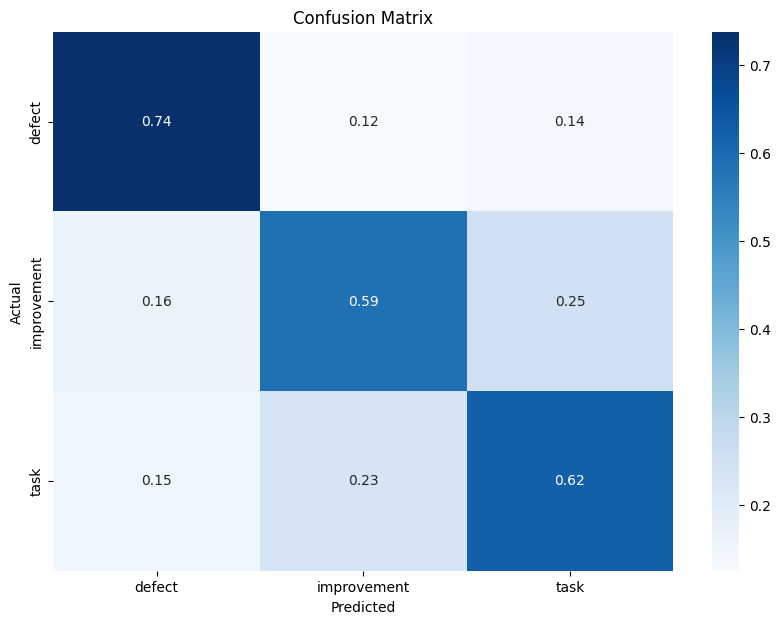

In [7]:
# graphs for results

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# give percentages in the confusion matrix instead of number
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
print(len(X_train[0]))

3611


In [10]:
# TRYING FOR BEST
def preprocess_text(text):
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

X = [preprocess_text(text) for text in X]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Class distribution after handling imbalance:", Counter(y_train))
print("Class distribution after handling imbalance:", Counter(y_test))

classes = np.unique(y_train)
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = {classes[i]: class_weights[i] for i in range(len(class_weights))}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.9)),  # Fit and transform only on training data
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))  # Multinomial Logistic Regression
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Class distribution after handling imbalance: Counter({'defect': 293352, 'improvement': 156575, 'task': 59894})
Class distribution after handling imbalance: Counter({'defect': 73288, 'improvement': 39129, 'task': 15039})


/Users/manitk/Desktop/SEM V/ML_Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7352341200100427
Classification Report:
               precision    recall  f1-score   support

      defect       0.79      0.88      0.83     73288
 improvement       0.66      0.63      0.65     39129
        task       0.55      0.29      0.38     15039

    accuracy                           0.74    127456
   macro avg       0.67      0.60      0.62    127456
weighted avg       0.72      0.74      0.72    127456

